# May the Normality Gods Smile Upon You: A Statistical journey to find the best test for your sample data

# Sir Francis Galton e os cavaleiros da távola Normal: uma jornada inusitada 

> Disclaimer: este texto, apesar de utilizar rigor científico, não utiliza as melhores formas para o objetivo. Para isto, veja ABC et al




Uma tarefa importante para qualquer pesquisador da área de ciências exatas, biológicas e agrárias é realizar testes estatísticos para auxiliar na tomada de decisão. A maioria dos testes utilizados, como o teste de comparação de médias de Tukey por exemplo, partem do pressuposto de que os dados seguem, pelo menos aproximadamente, a distribuição Normal. Como a normalidade dos dados é um *pressuposto* do teste, é importante verificar se a distribuição do conjunto de dados é similar ao da distribuição Normal.

Existem vários métodos para fazer esta verificação, que podem ser agrupaddos em dois grandes grupos: Métodos gráficos e Métodos numéricos. Os métodos gráficos envolvem a geração de gráficos para verificar visualmente o formato da distribuição dos dados, sendo geralmetne utilizado o histogramas de dispersão, gráfico de pontos, boxplot e papel de probabilidade (entre outros). Contudo, estes métodos demandam certa perícia do analística para a correta interpretação. Outro problema destes métodos é a necessidade de uma  quantidade grande de dados amostrais, o que na maioria dos casos é experimentalmente inviável, seja por custos financeiros, de tempo ou disponibilidade do pesquisador.

Os métodos numéricos não apresentam tais desvatanges: podem ser aplicados em dados experimentais com tamanho baixo (a partir de 3 repetições em alguns casos) e são bastante simples de se interpretar: se o $p-valor$ for menor do que o nível de significância ( $\alpha$ ), rejeita-se a hipótese nula de Normalidade dos dados. A grande desvantagem dos métodos numéricos é a complexidade dos calculos envolvidos no calculo da estatística do teste e do $p-valor$. Entretanto, com fácil acesso a computadores e softwares, esta desvantagem já não existe.

Diversos testes numéricos de Normalidade foram desenvolvidos ao longo das últimas décadas, destacando-se os testes de Kolmogorov-Smirnov, Anderson-Darling e Shapiro-Wilk. Outros testes, como o teste de Lilliefors, Abdi-Molin e Ryan-Joiner também são utilizados. A decisão sobre teste o pesquisador deve utilizar muita vezes é dificil, especialmente para aqueles com pouco conhecimento na área de estatística. Razali & Wah (2011) fizeram uma análise comparando o poder dos testes de 4 testes formais, concluíndo que o teste de Shapiro-Wilk seria o mais adequado. Contudo, os autores também apontaram que o teste de Shapiro-Wilk só consegue detectar discrepâncias em relação a hipótese nula com amostras com pelo menos 30 observações. 

## Objetivo
Neste artigo vamos investigar o desempenho dos principais testes numéricos de Normalidade quando confrontados com distribuições não Normais. Por experiência prévia e consulta da literatura, espera-se que o teste do Kolmogorov-Smirnov tenha o pior desempenho, enquanto que o teste de Shapiro-Wilk seja o que melhor desempenha.



## Os guerreiros

Os combatentes que se apresentam para enfrentar os desafios Gaussianos são:

### Shapiro-Wilk

O teste de [SHAPIRO & WILK (1965)](https://doi.org/10.2307/2333709) (referred to as SW henceforth) é, provavelmente, o teste mais utilizado para verificar se um conjunto de dados amostrais segue, pelo menos aproximadamente, a distribuição Normal. O teste foi desenvolvido como uma tentativa de formalmente resumir indicações obtidas nos gráficos de probabilidade, especialmente em relação aos desvios da linearidade obtida graficamente.

A estatística do teste é estimada através da Equação. Originalmente, foram propostos valores críticos para amostras de tamanho entre 3 e 50, para 1, 2, 5, 10, 50, 90, 95, 98 e 99% de significância. A conclusão do teste é realizada comparando $W_{critical}$ com $W{calc}$. Caso $W_{critical} \leq W{calc}$, não encontramos evidências suficientes para rejeitar a hipótese de Normalidade dos dados (teste unilateral à esquerda). Quando $W{calc}$ for mais próximo de 1, menores as chances da hipótese nula ser rejeitada.

A estatística do teste foi estimada com `scipy.stats.shapiro()`.

SHAPIRO, S. S.; WILK, M. B. An Analysis of Variance Test for Normality (Complete Samples). Biometrika, v. 52, n. 3, p. 591–611, 1965. DOI: 10.2307/2333709.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.stats.diagnostic import lilliefors
import seaborn as sns
import matplotlib as mpl

import sys
sys.path.insert(0, 'C:/Users/ander/Repositorios/val-metodos-analiticos/funcs')
import functions_paper as functions

Para fins de padronização e ser possível a repetição dos calculos, foi gerado uma sequência de números inteiros variando entre 1 até 1000. Esta sequência foi embaralhada utilizando a semente $42$. Cada elemento desta sequência será utilizado como semente para obter os dados aleatório de cada distribuição.

## As distribuições

Dez mil conjuntos de dados distintos foram criados aleatoriamente para cada distribuição (referred to as Dangeouns henceforth), contendo 30 observações cada. For replication purposes, ten thousand seeds (between 1 and 10001) were created and shuffled using the answer to the ultimate question of life, the universe, and everything as the main key.


In [2]:
n_samples = 10000
# n_samples = 500

seeds = np.arange(1,n_samples+1)
rng = np.random.default_rng(42)
rng.shuffle(seeds)


Cada guerreiro enfrenta os dez mil conjuntos de dados, com tamanho amostral variado utilizando a interseção dos valores críticos disponibilizados pelos autores (total de 19 conjunto de dados). Cada dangeoun conta com 19 níveis de dificuldade diferentes (quanto menor o tamanho amostral, mais dificil é a dangeoun), e cada guerreiro batalha 190000 vezes cada dangeoun.

In [3]:
n_rep = (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30)

### The first challenge: Galton's cave

A primeira batalha que nossos guerreiros devem enfrentar é a caverna de Galton. Esta caverna é criada com dados *provenientes* da distribuição Normal padrão (`scipy.stats.norm(loc=0.0, scale=1.0, size=max(n_rep))`). Espera-se que nossos guerreiros mantenham o nível de significância estipulado para os variados tamanhos amostrais. 



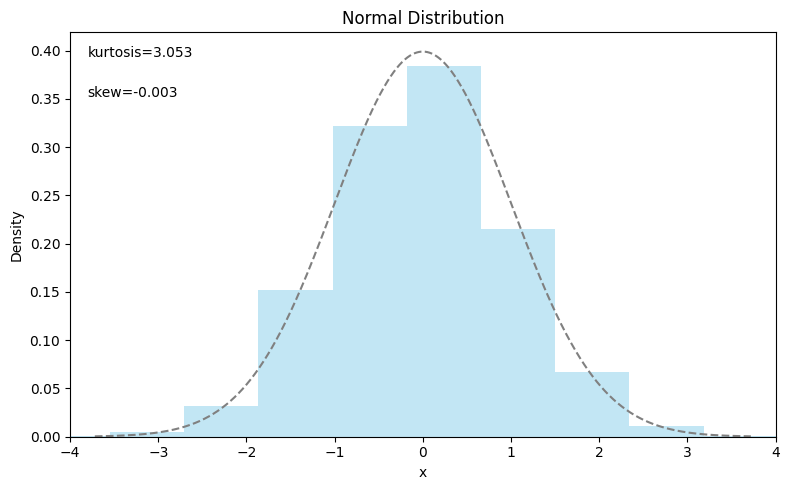

In [4]:
fig, ax = plt.subplots(figsize=(8,5))
x = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 10000)
ax.plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(42)
normal_data = rng.normal(loc=0.0, scale=1.0, size=x.size)
ax.hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax.text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data)+3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
ax.set_xlim(-4, 4)
ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.set_title("Normal Distribution")
fig.tight_layout()
plt.show()

In [5]:
abdi_result = []
ad_result = []
filli_result = []
ks_result = []
li_result = []
shapiro_result = []

n_rep_result = []
alpha_result = []
seed_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))

    for n in n_rep:
        abdi_result.append(functions.abdi_molin(normal_data[:n]))
        ad_result.append(functions.anderson_darling(normal_data[:n]))
        filli_result.append(functions.filliben(normal_data[:n]))
        ks_result.append(functions.ks_test(normal_data[:n]))
        li_result.append(functions.lilliefors_test(normal_data[:n]))
        shapiro_result.append(functions.shapiro_wilk_test(normal_data[:n]))
        
        seed_result.append([seed]*3)
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = functions.flatten(shapiro_result)
ks_result = functions.flatten(ks_result)
li_result = functions.flatten(li_result)
ad_result = functions.flatten(ad_result)
abdi_result = functions.flatten(abdi_result)
filli_result = functions.flatten(filli_result)
seed_result = functions.flatten(seed_result)
n_rep_result = functions.flatten(n_rep_result)
alpha_result = functions.flatten(alpha_result)        

df_data = pd.DataFrame({
    "Abdi-Molin": abdi_result,
    "Anderson-Darling": ad_result,    
    "Filliben": filli_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Shapiro-Wilk": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})


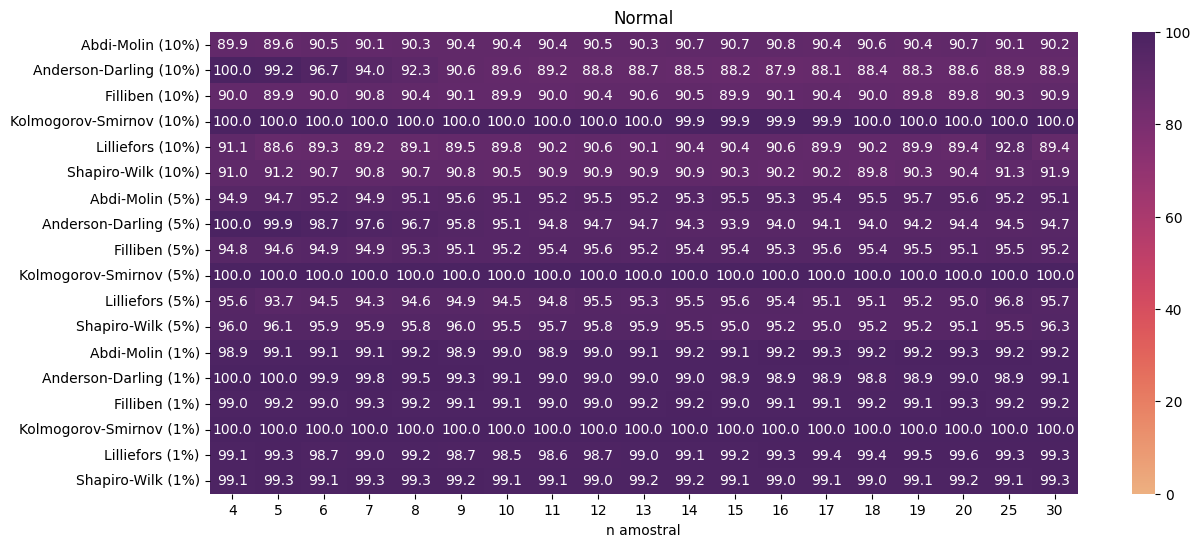

In [6]:
functions.make_heatmap(df_data, "Normal", n_samples)

In [7]:
df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_filli = pd.DataFrame({
    "Resultado": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})


df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})


df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result,
})




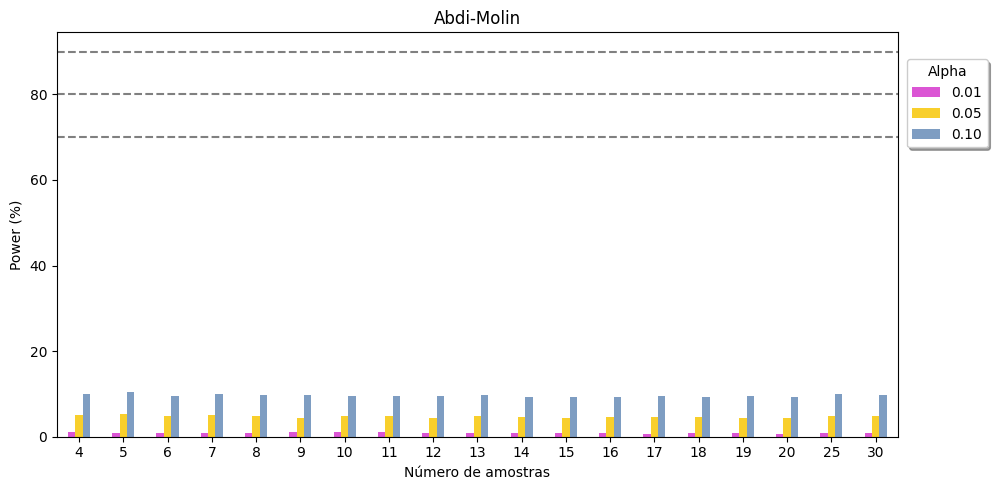

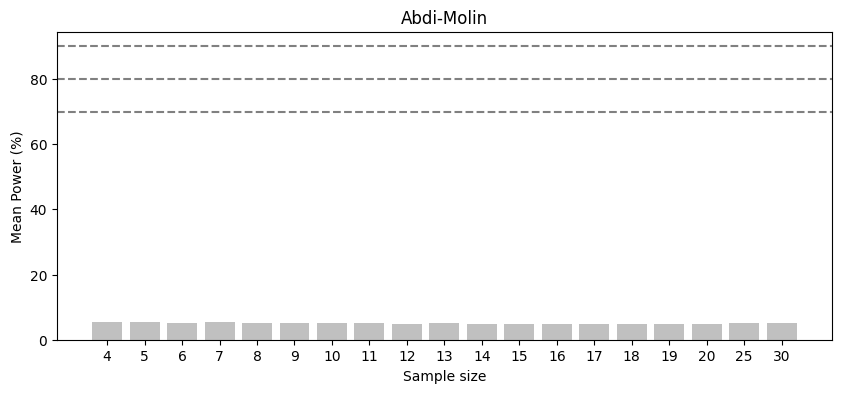

In [8]:
functions.make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=False)
functions.make_bar_plot_average_alpha(df_abdi, n_samples, "Abdi-Molin", kind=False)

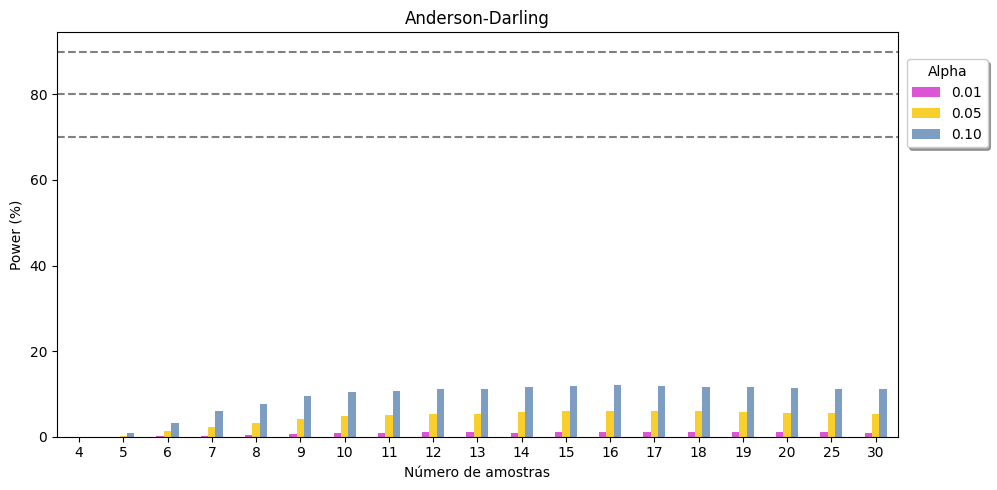

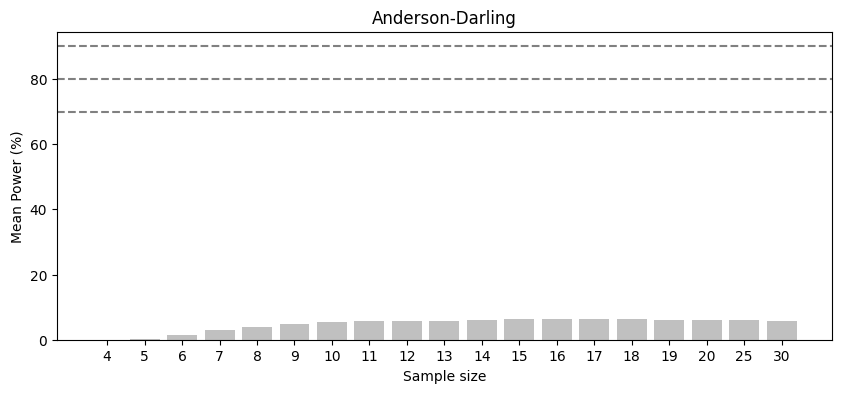

In [9]:
functions.make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=False)
functions.make_bar_plot_average_alpha(df_ad, n_samples, "Anderson-Darling", kind=False)

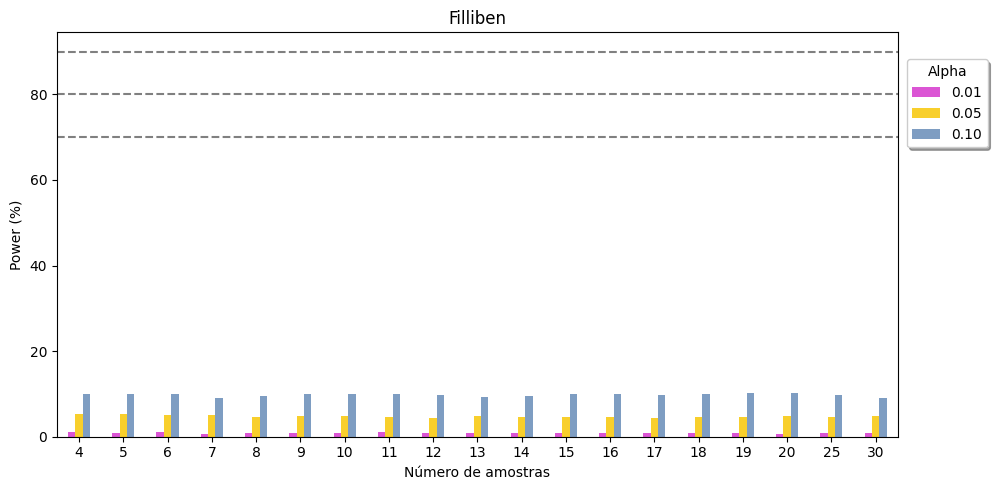

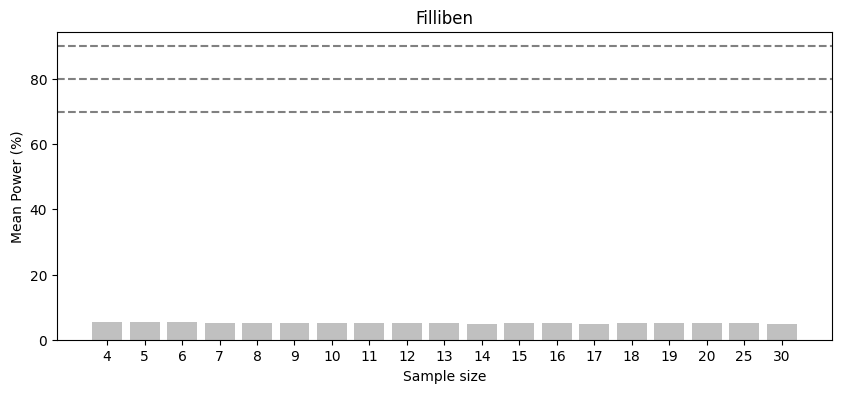

In [10]:
functions.make_bar_plot(df_filli, n_samples, "Filliben", kind=False)
functions.make_bar_plot_average_alpha(df_filli, n_samples, "Filliben", kind=False)

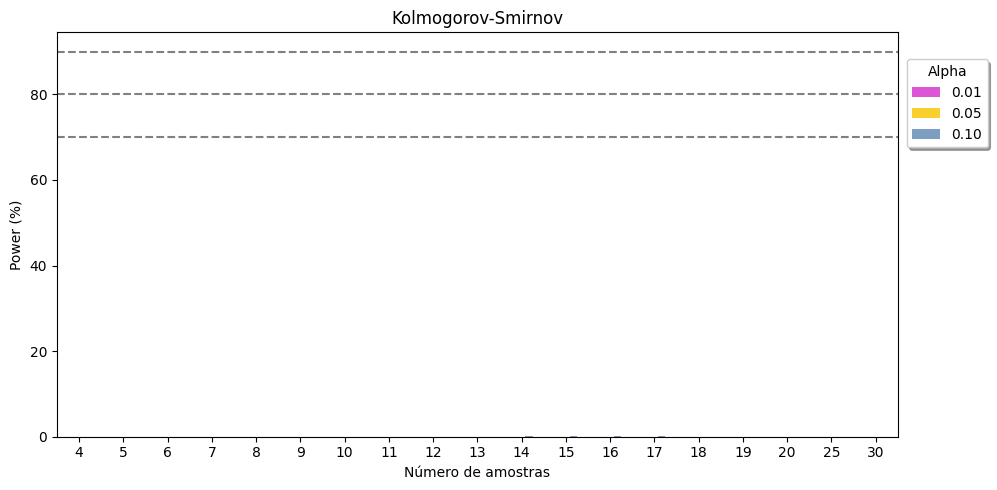

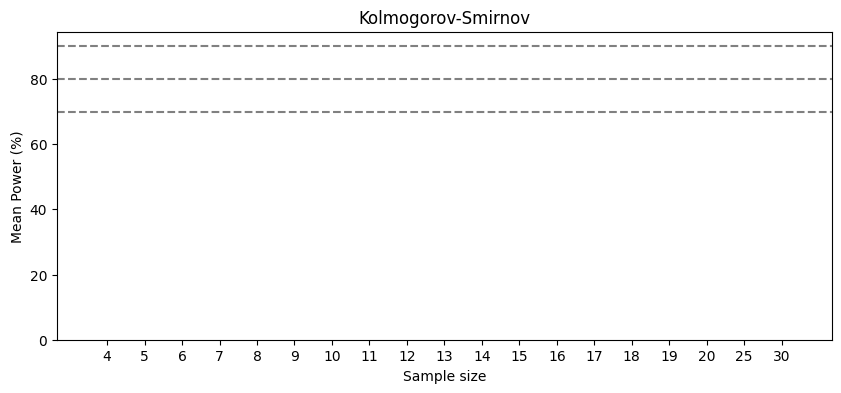

In [11]:
functions.make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)
functions.make_bar_plot_average_alpha(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)

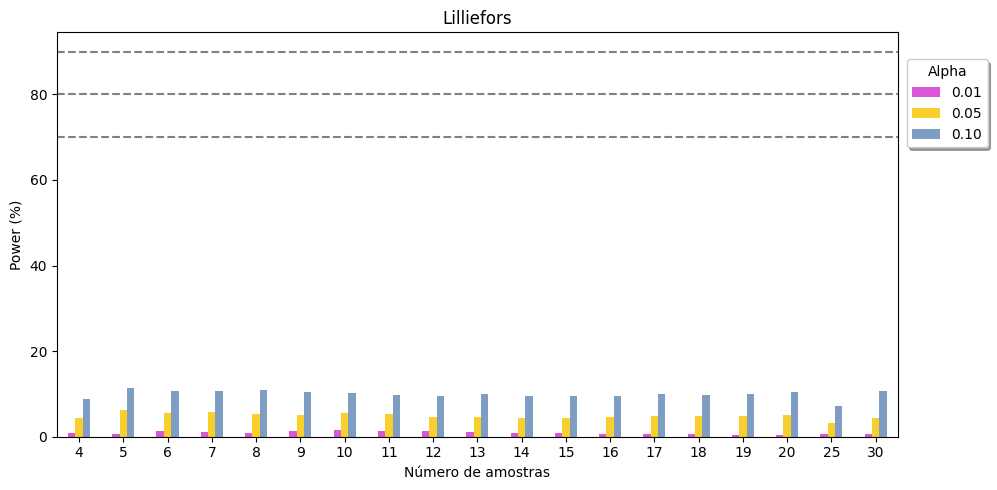

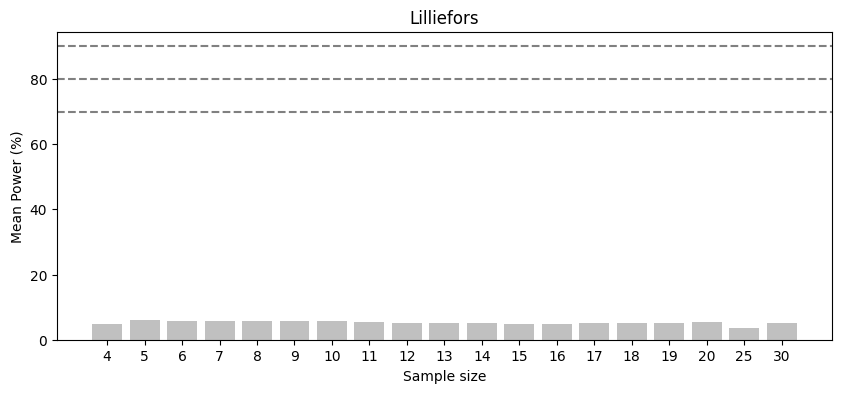

In [12]:
functions.make_bar_plot(df_li, n_samples, "Lilliefors", kind=False)
functions.make_bar_plot_average_alpha(df_li, n_samples, "Lilliefors", kind=False)

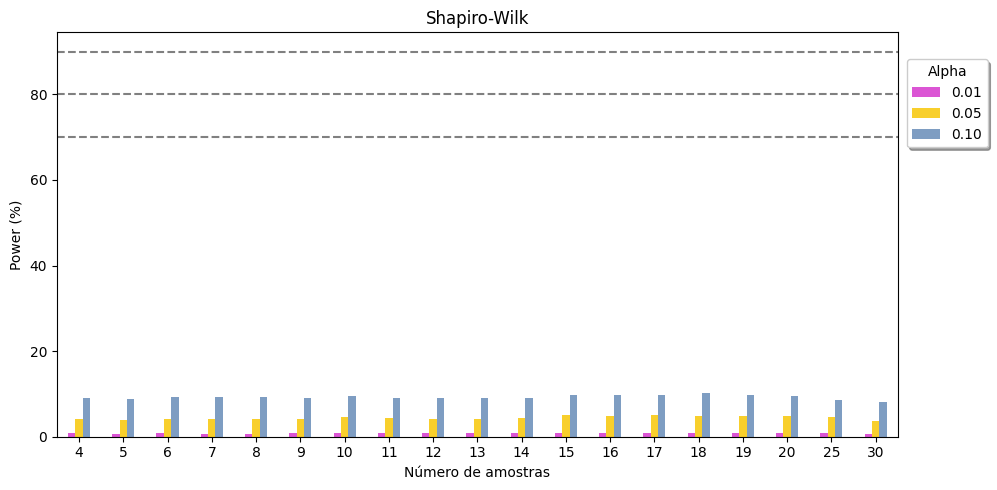

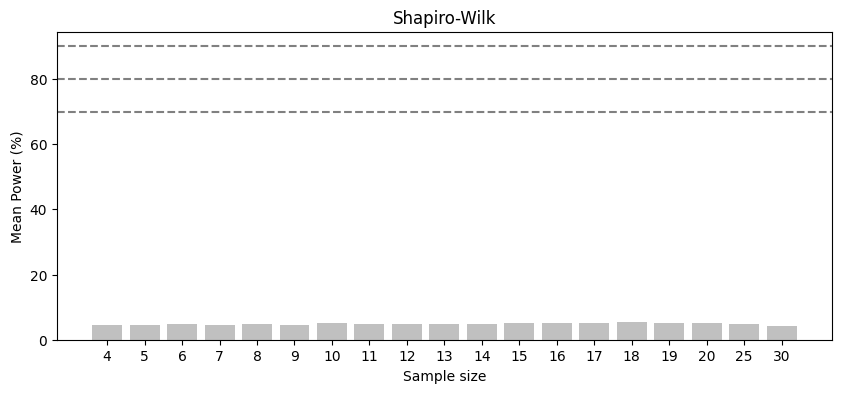

In [13]:
functions.make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)
functions.make_bar_plot_average_alpha(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

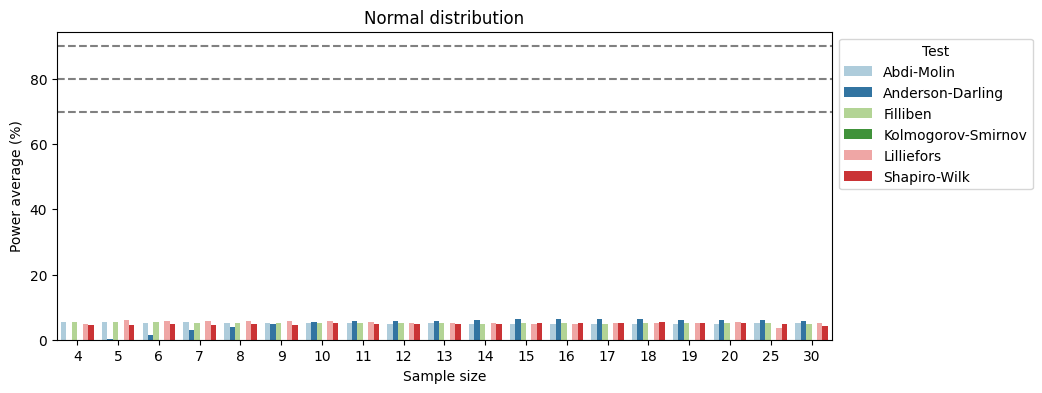

In [14]:
functions.make_global_average_bar_plot(
    [df_abdi, df_ad, df_filli, df_ks, df_li, df_shapiro], 
    ["Abdi-Molin", "Anderson-Darling", "Filliben", "Kolmogorov-Smirnov",  "Lilliefors", "Shapiro-Wilk"], 
    n_samples, "Normal distribution", kind=False)

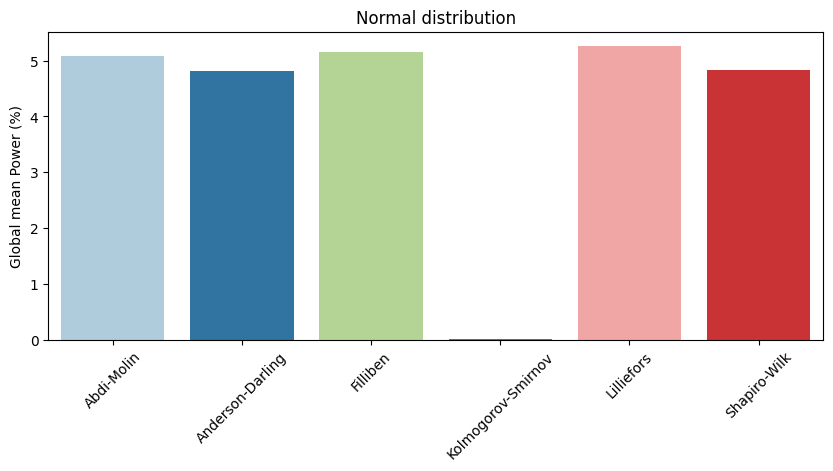

In [15]:
functions.make_plot_average_alpha_size(
    [df_abdi, df_ad, df_filli, df_ks, df_li, df_shapiro], 
    ["Abdi-Molin", "Anderson-Darling", "Filliben", "Kolmogorov-Smirnov",  "Lilliefors", "Shapiro-Wilk"],
    n_samples, "Normal distribution", kind=False)

#### Visualização

A jornada inicia com uma verificação das redondezas pelos nossos heróis. 



In [16]:
rng = np.random.default_rng(42)
seed_to_visualize_data = rng.choice(seeds, size=6, replace=False)

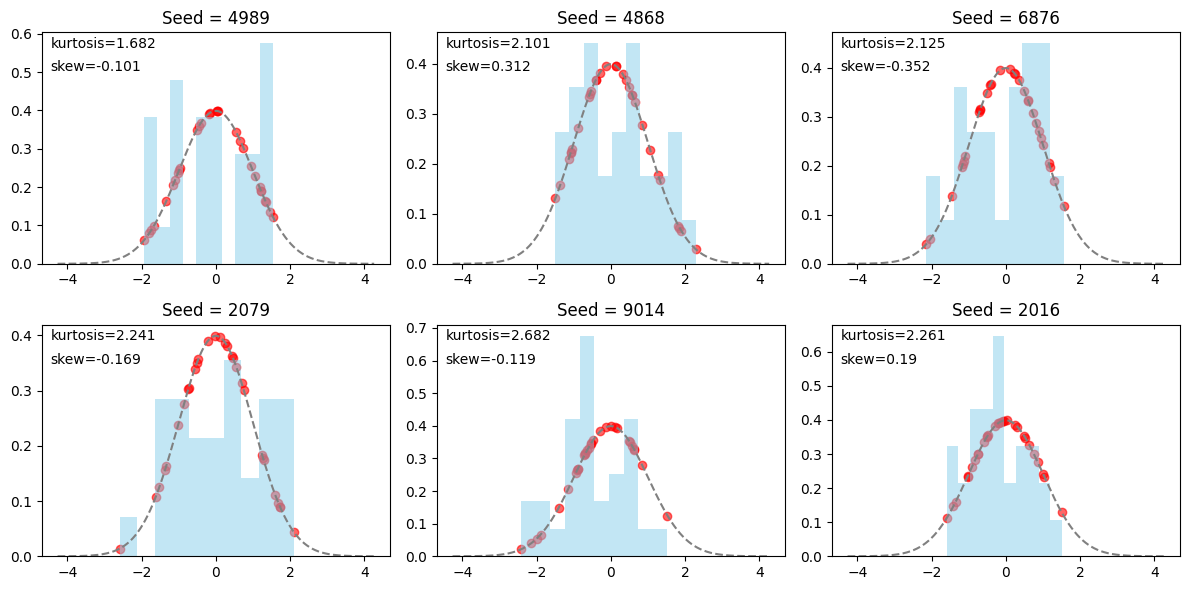

In [17]:
x = np.linspace(stats.norm.ppf(0.00001), stats.norm.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,0].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[0,0].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,0].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,1].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[0,1].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,1].transAxes)
ax[0,1].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,1].transAxes)
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 2
ax[0,2].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[0,2].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[0,2].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,2].transAxes)
ax[0,2].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[0,2].transAxes)
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,0].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[1,0].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,0].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,1].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[1,1].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,1].transAxes)
ax[1,1].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,1].transAxes)
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.norm.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
ax[1,2].scatter(normal_data, stats.norm.pdf(normal_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].hist(normal_data, density=True, alpha=0.5, color="skyblue")
ax[1,2].text(0.025, 0.95, f"kurtosis={round(stats.kurtosis(normal_data) + 3, 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,2].transAxes)
ax[1,2].text(0.025, 0.85, f"skew={round(stats.skew(normal_data), 3)}", horizontalalignment='left', verticalalignment='center', transform=ax[1,2].transAxes)
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [18]:
data_kurtosis = []
data_skew = []
mean = []
std = []


for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.normal(loc=0.0, scale=1.0, size=max(n_rep))
    data_kurtosis.append(stats.kurtosis(normal_data)+3)
    # data_kurtosis +=  [stats.kurtosis(normal_data)+3]*19*3
    data_skew.append(stats.skew(normal_data))
    # data_skew += [stats.skew(normal_data)]*19*3
    mean.append(np.mean(normal_data))
    # mean += [np.mean(normal_data)]*19*3
    std.append(np.std(normal_data, ddof=1))
    # std += [np.std(normal_data, ddof=1)]*19*3

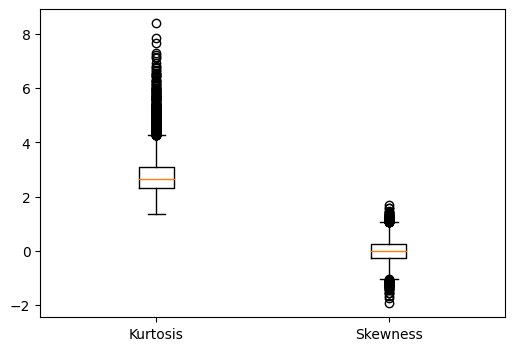

In [19]:
plt.figure(figsize=(6,4))
plt.boxplot([data_kurtosis, data_skew], labels=["Kurtosis", "Skewness"])
plt.show()

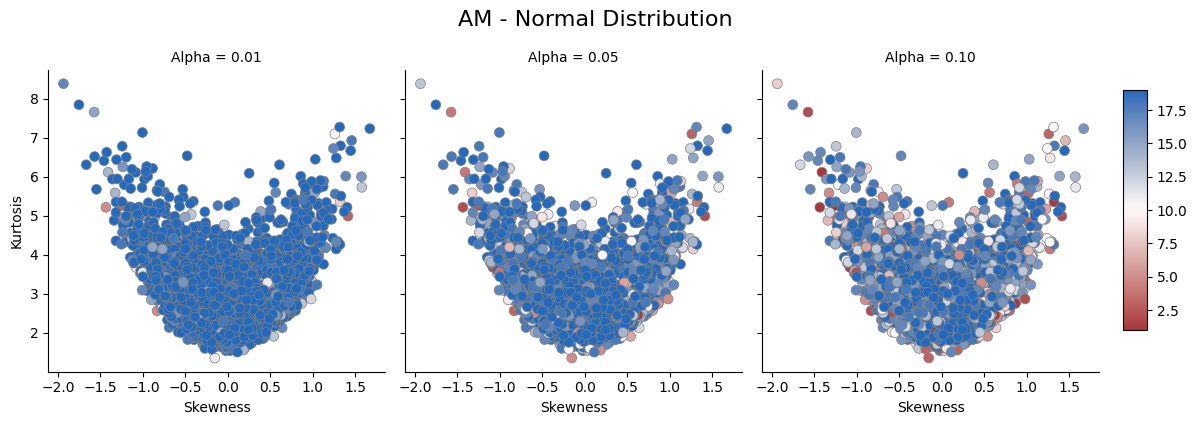

In [20]:
df_abdi["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_abdi, seeds, data_kurtosis, data_skew, "AM - Normal Distribution")

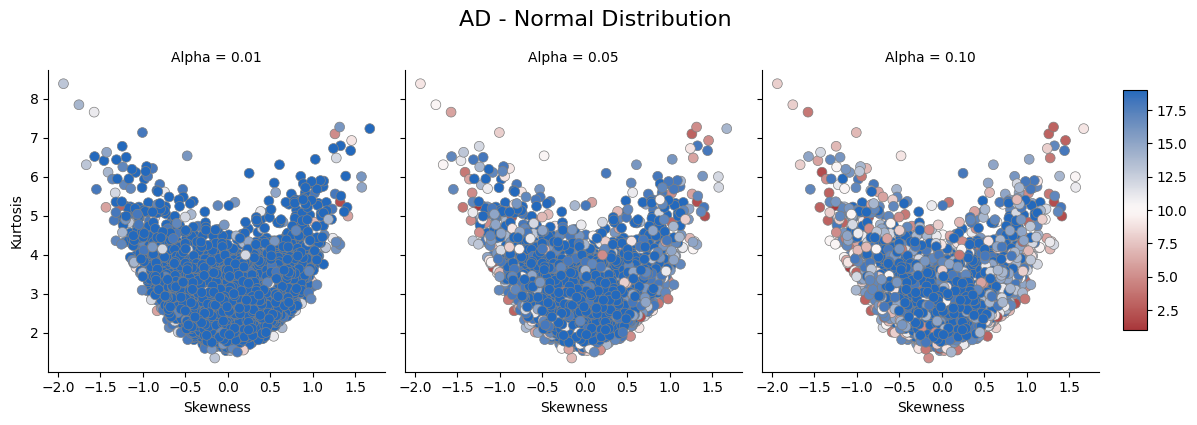

In [21]:
df_ad["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_ad, seeds, data_kurtosis, data_skew, "AD - Normal Distribution")

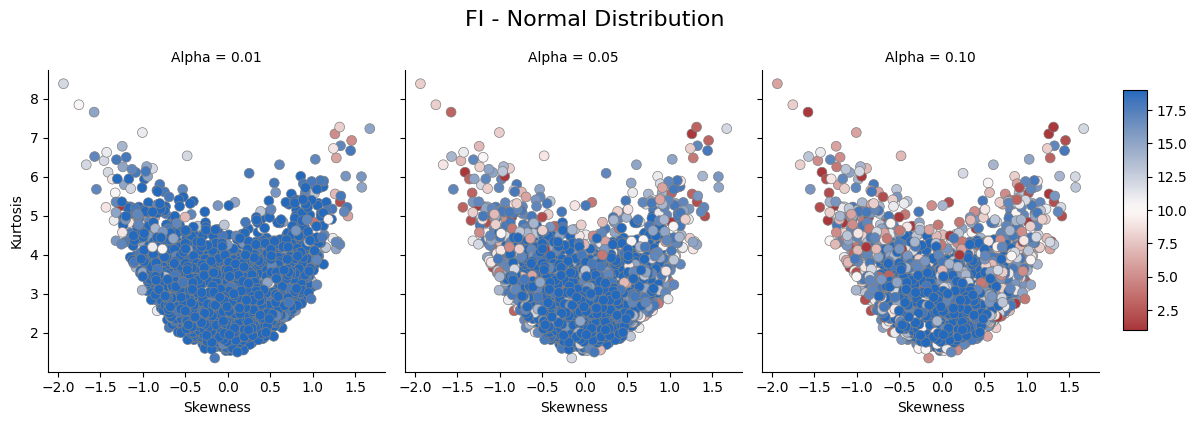

In [22]:
df_filli["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_filli, seeds, data_kurtosis, data_skew, "FI - Normal Distribution")

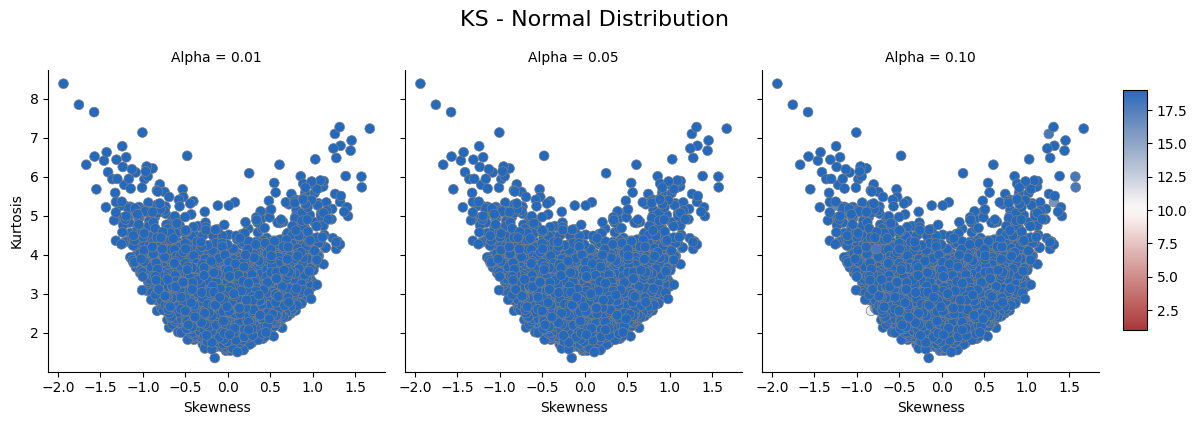

In [23]:
df_ks["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_ks, seeds, data_kurtosis, data_skew, "KS - Normal Distribution")

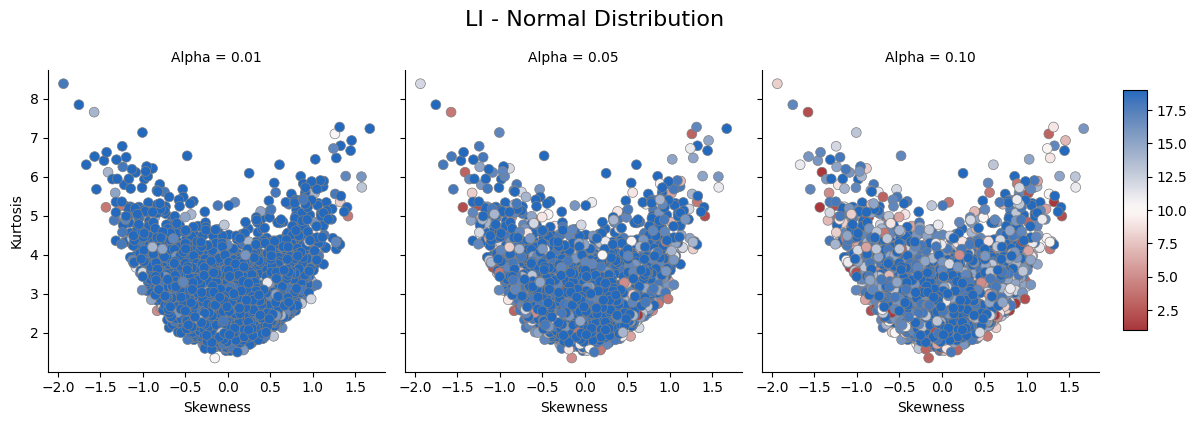

In [24]:
df_li["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_li, seeds, data_kurtosis, data_skew, "LI - Normal Distribution")

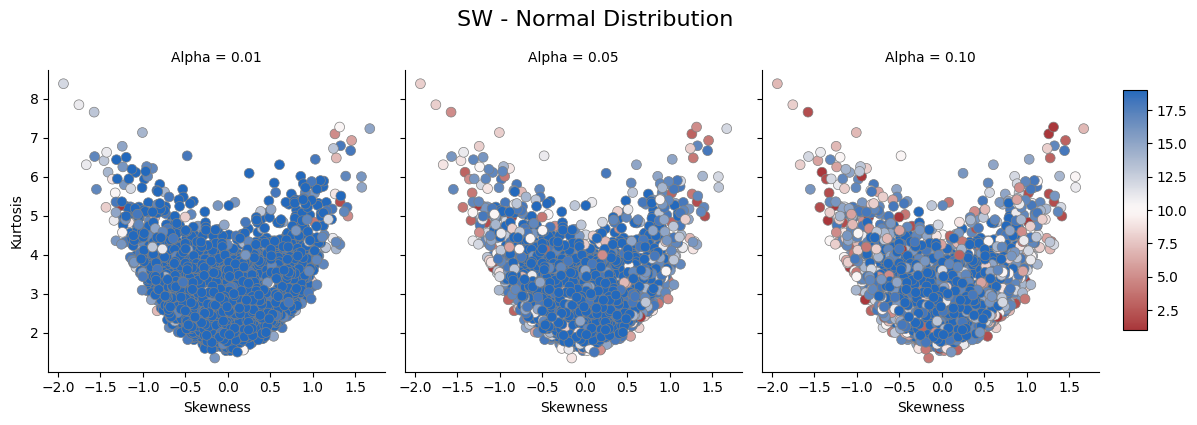

In [25]:
df_shapiro["Seed"] = seed_result
functions.make_skew_kurtosis_plot(df_shapiro, seeds, data_kurtosis, data_skew, "SW - Normal Distribution")
    

### calculo para juntar tudo

In [26]:
df_normal = functions.make_calc(df_data, True)
df_normal["Distribution"] = "Normal"

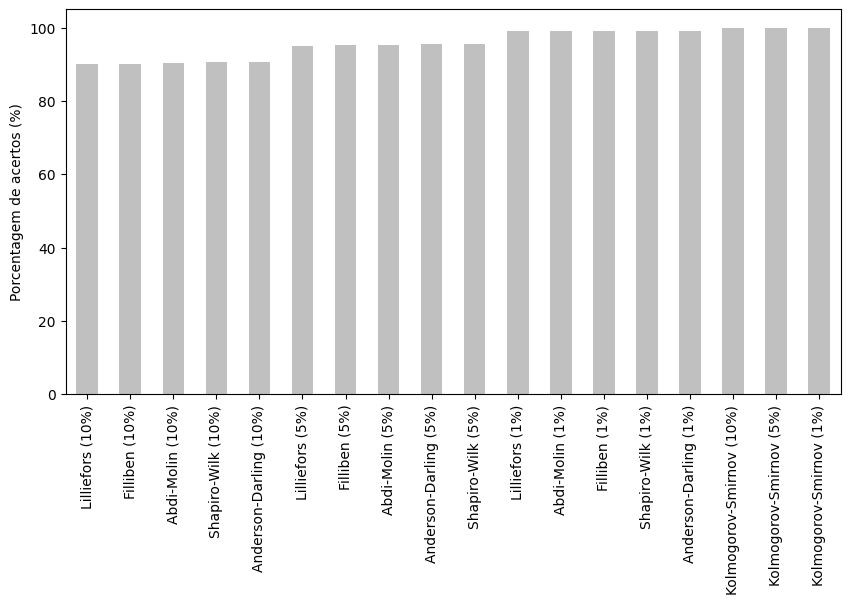

In [27]:
functions.plot_all_results_percentage(df_normal, n_samples)

In [28]:
a

NameError: name 'a' is not defined

## Dados provenientes de uma distribuição Exponencial

In [ ]:
plt.subplots(figsize=(8,4))
x = np.linspace(stats.expon.ppf(0.001), stats.expon.ppf(0.999), 1000)
plt.plot(x, stats.expon.pdf(x), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

In [ ]:
data_kurtosis = []
data_skew = []
mean = []
std = []


for seed in seeds:
    rng = np.random.default_rng(seed)
    expon_data = rng.exponential(scale=1.0, size=max(n_rep))
    data_kurtosis.append(stats.kurtosis(expon_data)+3)
    data_skew.append(stats.skew(expon_data))
    mean.append(np.mean(expon_data))
    std.append(np.std(expon_data, ddof=1))

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot([data_kurtosis, data_skew], labels=["Kurtosis", "Skewness"])
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data_skew, data_kurtosis, )

x_lim = 1.1*np.max(np.abs(data_skew))
plt.xlim(-1*x_lim, x_lim)

y_lim = 1.1*np.max(np.abs(data_kurtosis))
# plt.ylim(-1*y_lim, y_lim)


plt.ylabel("Kurtosis")
plt.xlabel("Skewness")
plt.show()

In [ ]:
x = np.linspace(stats.expon.ppf(0.00001), stats.expon.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,0].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,1].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 2
ax[0,2].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[0,2].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,0].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,1].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.expon.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
expon_data = rng.exponential(scale=1.0, size=max(n_rep))
ax[1,2].scatter(expon_data, stats.expon.pdf(expon_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [ ]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
filli_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    exponential_data = rng.exponential(scale=1.0, size=max(n_rep))

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(exponential_data[:n]))
        ks_result.append(ks_test(exponential_data[:n]))
        ad_result.append(anderson_darling(exponential_data[:n]))
        li_result.append(lilliefors_test(exponential_data[:n]))
        abdi_result.append(abdi_molin(exponential_data[:n]))
        filli_result.append(filliben(exponential_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
filli_result = flatten(filli_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "Filliben": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Exponential", n_samples, normal=False)

In [ ]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_filli = pd.DataFrame({
    "Resultado": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

In [ ]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

In [ ]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

In [ ]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_li, n_samples, "Lilliefors", kind=True)

In [ ]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_ad, n_samples, "Anderson-Darling", kind=True)

In [ ]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_abdi, n_samples, "Abdi-Molin", kind=True)

In [ ]:
make_bar_plot(df_filli, n_samples, "Filliben", kind=True)

In [ ]:
make_bar_plot_average_alpha(df_filli, n_samples, "Filliben", kind=True)

In [ ]:
make_calc_average_alpha(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

In [ ]:
make_global_average_bar_plot([df_shapiro, df_ks, df_ad, df_li, df_abdi, df_filli], ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Anderson-Darling", "Lilliefors", "Abdi-Molin", "Filliben"], n_samples, kind=False)

In [ ]:
make_plot_average_alpha_size([df_shapiro, df_ks, df_ad, df_li, df_abdi, df_filli], ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Anderson-Darling", "Lilliefors", "Abdi-Molin", "Filliben"], n_samples, kind=False)

### calculo para juntar tudo

In [ ]:
df_exponential = make_calc(df_data, False)
df_exponential["Distribution"] = "Exponential"

In [ ]:
plot_all_results(df_exponential)

In [ ]:
plot_all_results(pd.concat([df_normal,df_exponential]))

## Dados provenientes de uma distribuição Uniforme

In [ ]:
plt.subplots(figsize=(8,4))
x = np.linspace(stats.uniform.ppf(0.001), stats.uniform.ppf(0.999), 1000)
plt.plot(x, stats.uniform.pdf(x), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

In [ ]:
x = np.linspace(stats.uniform.ppf(0.00001), stats.uniform.ppf(0.99999), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,0].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,1].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[0,2].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")



i = 3
ax[1,0].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,0].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,1].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.uniform.pdf(x), ls='--', c="gray", label='Teórico')
rng = np.random.default_rng(seed_to_visualize_data[i])
uniform_data = rng.uniform(size=max(n_rep))
ax[1,2].scatter(uniform_data, stats.uniform.pdf(uniform_data), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [ ]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
filli_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    uniform_data = rng.uniform(size=max(n_rep))

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(uniform_data[:n]))
        ks_result.append(ks_test(uniform_data[:n]))
        ad_result.append(anderson_darling(uniform_data[:n]))
        li_result.append(lilliefors_test(uniform_data[:n]))
        abdi_result.append(abdi_molin(uniform_data[:n]))
        filli_result.append(filliben(uniform_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
filli_result = flatten(filli_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "Filliben": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "uniform", n_samples, normal=False)



In [ ]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_filli = pd.DataFrame({
    "Resultado": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

In [ ]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

In [ ]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

In [ ]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

In [ ]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

In [ ]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

In [ ]:
make_bar_plot(df_filli, n_samples, "Filliben", kind=True)

### Calculo para juntar tudo 

In [ ]:
df_uniform = make_calc(df_data, False)
df_uniform["Distribution"] = "Uniform"
plot_all_results(df_uniform)

In [ ]:
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform]))

## Dados proveientes de uma distribuição Lognormal

In [ ]:
s = .5

plt.subplots(figsize=(8,4))
x = np.linspace(stats.lognorm.ppf(0.001, s=s), stats.lognorm.ppf(0.999, s=s), 1000)
plt.plot(x, stats.lognorm.pdf(x, s=s), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

In [ ]:
s = .5
x = np.linspace(stats.lognorm.ppf(0.001, s=s), stats.lognorm.ppf(0.999, s=s), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.lognorm.pdf(x, s=s), ls='--', c="gray", label='Teórico')
lognorm_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(lognorm_data, stats.lognorm.pdf(lognorm_data, s=s), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [ ]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
filli_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    lognormal_data = stats.lognorm.rvs(s, loc=0, scale=1, size=max(n_rep), random_state=seed)

    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(lognormal_data[:n]))
        ks_result.append(ks_test(lognormal_data[:n]))
        ad_result.append(anderson_darling(lognormal_data[:n]))
        li_result.append(lilliefors_test(lognormal_data[:n]))
        abdi_result.append(abdi_molin(lognormal_data[:n]))
        filli_result.append(filliben(lognormal_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
filli_result = flatten(filli_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "Filliben": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Lognormal", n_samples, normal=False)



In [ ]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_filli = pd.DataFrame({
    "Resultado": filli_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

In [ ]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

In [ ]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

In [ ]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

In [ ]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

In [ ]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

In [ ]:
make_bar_plot(df_filli, n_samples, "Filliben", kind=True)

In [ ]:
df_lognormal = make_calc(df_data, False)
df_lognormal["Distribution"] = "Lognormal"
plot_all_results(df_lognormal)

In [ ]:
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal]))

In [ ]:
a

## Dados provenientes de uma distribuição t de Student (df=5)

In [ ]:
df = 5

plt.subplots(figsize=(8,4))
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)
plt.plot(x, stats.t.pdf(x, df=df), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()


In [ ]:
df = 5
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.t.pdf(x, df=df), ls='--', c="gray", label='Teórico')
t_data = stats.t.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(t_data, stats.t.pdf(t_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [ ]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    for n in n_rep:
        t_data = stats.t.rvs(n-1, loc=0, scale=1, size=n, random_state=seed)
        shapiro_result.append(shapiro_wilk_test(t_data[:n]))
        ks_result.append(ks_test(t_data[:n]))
        ad_result.append(anderson_darling(t_data[:n]))
        li_result.append(lilliefors_test(t_data[:n]))
        abdi_result.append(abdi_molin(t_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "t-Student", n_samples, normal=True)


In [ ]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

In [ ]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=True)

In [ ]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=True)

In [ ]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=True)

In [ ]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=True)

In [ ]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=True)

In [ ]:
df_t_student = make_calc(df_data, True)
df_t_student["Distribution"] = "t-Student"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal, df_t_student]))

In [ ]:
df_normal_acertos = df_normal.sum(numeric_only = True).to_frame(name="Normal")
df_exponential_acertos = df_exponential.sum(numeric_only = True).to_frame(name="Exponencial")
df_uniform_acertos = df_uniform.sum(numeric_only = True).to_frame(name="Uniform")
df_lognormal_acertos = df_lognormal.sum(numeric_only = True).to_frame(name="Lognormal")
df_t_student_acertos = df_t_student.sum(numeric_only = True).to_frame(name="t_student")

In [ ]:
def make_staked_bar(dfs, patterns):
    for i in range(len(patterns)):
        if patterns[i]:
            patterns[i] = "//"
        else:
            patterns[i] = "||"

    df = pd.concat(dfs, axis=1)
    df["soma"] = df.sum(axis=1)
    df = df.sort_values(by="soma")
    df = df.drop("soma", axis=1)
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax = df.plot(kind='barh', stacked=True, ax=ax, cmap="Pastel1")
    # patterns = ('//', '||', '||', '||', '//')
    bars = [thing for thing in ax.containers if isinstance(thing,mpl.container.BarContainer)]
    for bar, pattern in zip(bars, patterns):
        for patch in bar:
            # patch.set_hatch(next(patterns))
            patch.set_hatch(pattern)
            patch.set_edgecolor("gray")
    
    # ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.95), fancybox=True, shadow=True, title="Alpha",)
    ax.legend(loc='best', fancybox=True, shadow=True, title="Distribution",)
    ax.set_xlabel("Número de acertos")
    fig.tight_layout()
    plt.show()
    
patterns = [True, False, False, False, True]    
make_staked_bar([df_normal_acertos, df_exponential_acertos, df_uniform_acertos, df_lognormal_acertos, df_t_student_acertos], patterns)

## Dados provenientes de uma distribuição Qui quadrado (df=1)

In [ ]:
df = 1

plt.subplots(figsize=(8,4))
x = np.linspace(stats.chi.ppf(0.0001, df=df), stats.chi.ppf(0.9999, df=df), 1000)
plt.plot(x, stats.chi.pdf(x, df=df), 'k', label='norm pdf')
plt.xlabel("$x$")
plt.ylabel("Densidade")
plt.show()

In [ ]:
df = 1
x = np.linspace(stats.chi.ppf(0.0001, df=df), stats.chi.ppf(0.9999, df=df), 1000)

fig, ax = plt.subplots(2,3, figsize=(12,6))

i = 0
ax[0,0].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,0].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 1
ax[0,1].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,1].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,1].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 2
ax[0,2].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[0,2].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[0,2].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 3
ax[1,0].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,0].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,0].set_title(f"Seed = {seed_to_visualize_data[i]}")

i = 4
ax[1,1].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,1].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,1].set_title(f"Seed = {seed_to_visualize_data[i]}")


i = 5
ax[1,2].plot(x, stats.chi.pdf(x, df=df), ls='--', c="gray", label='Teórico')
chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed_to_visualize_data[i])
ax[1,2].scatter(chi_data, stats.chi.pdf(chi_data, df=df), color="r", alpha=.6, label=f'Seed = {seed_to_visualize_data[i]}')
ax[1,2].set_title(f"Seed = {seed_to_visualize_data[i]}")

fig.tight_layout()
plt.show()   

In [ ]:
ks_result = []
ad_result = []
li_result = []
shapiro_result = []
abdi_result = []
n_rep_result = []
alpha_result = []

for seed in seeds:
    chi_data = stats.chi.rvs(df, loc=0, scale=1, size=max(n_rep), random_state=seed)
    
    for n in n_rep:
        shapiro_result.append(shapiro_wilk_test(chi_data[:n]))
        ks_result.append(ks_test(chi_data[:n]))
        ad_result.append(anderson_darling(chi_data[:n]))
        li_result.append(lilliefors_test(chi_data[:n]))
        abdi_result.append(abdi_molin(chi_data[:n]))
        n_rep_result.append([n]*3)
        alpha_result.append(["0.01", "0.05", "0.10"])
        
shapiro_result = flatten(shapiro_result)
ks_result = flatten(ks_result)
li_result = flatten(li_result)
ad_result = flatten(ad_result)
abdi_result = flatten(abdi_result)
n_rep_result = flatten(n_rep_result)
alpha_result = flatten(alpha_result)        

df_data = pd.DataFrame({
    "Shapiro-Wilk": shapiro_result,
    "Kolmogorov-Smirnov": ks_result,
    "Lilliefors": li_result,
    "Anderson-Darling": ad_result,    
    "Abdi-Molin": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

make_heatmap(df_data, "Chi2 (df=1)", n_samples, normal=False)


In [ ]:
df_shapiro = pd.DataFrame({
    "Resultado": shapiro_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ks = pd.DataFrame({
    "Resultado": ks_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_li = pd.DataFrame({
    "Resultado": li_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result
})

df_ad = pd.DataFrame({
    "Resultado": ad_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

df_abdi = pd.DataFrame({
    "Resultado": abdi_result,
    "n amostral": n_rep_result,
    "Alpha": alpha_result    
})

In [ ]:
make_bar_plot(df_shapiro, n_samples, "Shapiro-Wilk", kind=False)

In [ ]:
make_bar_plot(df_ks, n_samples, "Kolmogorov-Smirnov", kind=False)

In [ ]:
make_bar_plot(df_li, n_samples, "Lilliefors", kind=False)

In [ ]:
make_bar_plot(df_ad, n_samples, "Anderson-Darling", kind=False)

In [ ]:
make_bar_plot(df_abdi, n_samples, "Abdi-Molin", kind=False)

In [ ]:
df_chi_df1 = make_calc(df_data, True)
df_chi_df1["Distribution"] = "Chi-Quadrado (df=1)"
plot_all_results(pd.concat([df_normal, df_exponential, df_uniform, df_lognormal, df_t_student, df_chi_df1]))

In [ ]:
df_chi_df1_acertos = df_chi_df1.sum(numeric_only = True).to_frame(name="ChiQuadrado (df=1)")

In [ ]:
patterns = [True, False, False, False, True, False]    
make_staked_bar([df_normal_acertos, df_exponential_acertos, df_uniform_acertos, df_lognormal_acertos, df_t_student_acertos, df_chi_df1_acertos], patterns)

In [ ]:
df_chi_df1_acertos.plot(kind="bar")

## Dados provenientes de uma distribuição Weibull (a=5)

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    weibull_data = rng.weibull(a=5, size=size)
    make_kernal_plot(weibull_data, f"Seed = {seed}")


## Dados proveientes de uma distribuição Cauchy

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    standard_cauchy_data = rng.standard_cauchy(size=size)
    make_kernal_plot(standard_cauchy_data, f"Seed = {seed}")


## Dados provenientes de uma distribuição Gamma

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    gamma_data = rng.gamma(shape=1, size=size)
    make_kernal_plot(gamma_data, f"Seed = {seed}")


## Dados provenientes de uma distribuição Logistic

In [ ]:
for seed in seed_to_visualize_data:
    rng = np.random.default_rng(seed)
    logistic_data = rng.logistic(size=size)
    make_kernal_plot(logistic_data, f"Seed = {seed}")


In [ ]:
shapiro_wilk_table = {
    0.01 : (0.753, 0.687, 0.686, 0.713, 0.730, 0.749, 0.764, 0.781, 0.792, 0.805, 0.814, 0.825, 0.835, 0.844, 0.851, 0.858, 0.863, 
            0.868, 0.873, 0.878, 0.881, 0.884, 0.888, 0.891, 0.894, 0.896, 0.898, 0.900, 0.902, 0.904, 0.906, 0.908, 0.910, 0.912, 
            0.914, 0.916, 0.917, 0.919, 0.920, 0.922, 0.923, 0.924, 0.926, 0.927, 0.928, 0.929, 0.929, 0.930),
    0.05 : (0.767, 0.748, 0.762, 0.788, 0.803, 0.818, 0.829, 0.842, 0.850, 0.859, 0.866, 0.874, 0.881, 0.887, 0.892, 0.897, 0.901, 
            0.905, 0.908, 0.911, 0.914, 0.916, 0.918, 0.920, 0.923, 0.924, 0.926, 0.927, 0.929, 0.930, 0.931, 0.933, 0.934, 0.935, 
            0.936, 0.938, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 0.945, 0.946, 0.947, 0.947, 0.947),
    0.10 : (0.789, 0.792, 0.806, 0.826, 0.838, 0.851, 0.859, 0.869, 0.876, 0.883, 0.889, 0.895, 0.901, 0.906, 0.910, 0.914, 0.917, 
            0.920, 0.923, 0.926, 0.928, 0.930, 0.931, 0.933, 0.935, 0.936, 0.937, 0.939, 0.940, 0.941, 0.942, 0.943, 0.944, 0.945, 
            0.946, 0.947, 0.948, 0.949, 0.950, 0.951, 0.951, 0.952, 0.953, 0.953, 0.954, 0.954, 0.955, 0.955),
}

def shapiro_wilk_test(x):
    n_rep = x.size
    result = stats.shapiro(x)
    if result[0] > shapiro_wilk_table[0.01][n_rep - 3]:
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] > shapiro_wilk_table[0.05][n_rep - 3]:
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0        
        
    if result[0] > shapiro_wilk_table[0.1][n_rep - 3]:
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10

In [ ]:
def get_ks_critical(n_rep, alpha):    
    kolmogorov_smirnov = {
        0.10: (0.950, 0.776, 0.642, 0.564, 0.510, 0.470, 0.438, 0.411, 0.388, 0.368, 0.352, 0.338, 0.325, 0.314, 0.304, 0.295, 
               0.286, 0.278, 0.272, 0.264, 0.24, 0.22, 0.21),
        0.05: (0.975, 0.842, 0.708, 0.624, 0.565, 0.521, 0.486, 0.457, 0.432, 0.410, 0.391, 0.375, 0.361, 0.349, 0.338, 0.328, 
               0.318, 0.309, 0.301, 0.294, 0.27, 0.24, 0.23),
        0.01: (0.995, 0.929, 0.828, 0.733, 0.669, 0.618, 0.577, 0.543, 0.514, 0.490, 0.468, 0.450, 0.433, 0.418, 0.404, 0.392, 
               0.381, 0.371, 0.363, 0.356, 0.32, 0.29, 0.27)
        }

    if n_rep < 21:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][n_rep - 1]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][n_rep - 1]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][n_rep - 1]
        else:
            tabulated = None #
    elif n_rep < 26:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][20]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][20]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][20]
        else:
            tabulated = None #
    elif n_rep < 31:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][21]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][21]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][21]
        else:
            tabulated = None #
    elif n_rep < 36:
        if alpha == 0.01:
            tabulated = kolmogorov_smirnov[0.01][22]
        elif alpha == 0.05:
            tabulated = kolmogorov_smirnov[0.05][22]
        elif alpha == 0.10:
            tabulated = kolmogorov_smirnov[0.10][22]
        else:
            tabulated = None #
    else: ## if n_rep is higher than 25, return the aproximation value
        if alpha == 0.01:
            tabulated = 1.63/np.sqrt(n_rep)
        elif alpha == 0.05:
            tabulated = 1.36/np.sqrt(n_rep)
        elif alpha == 0.1:
            tabulated = 1.22/np.sqrt(n_rep)
        else:
            tabulated = None # if you don't have a tabulated value for the chosen alpha value, return None #       
    return tabulated

def ks_test(x):
    n_rep = x.size
    result = stats.kstest(x, cdf='norm', args=(x.mean(), x.std(ddof=1)), N=n_rep)
    if result[0] < get_ks_critical(n_rep, 0.01):
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] < get_ks_critical(n_rep, 0.05):
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0
        
    if result[0] < get_ks_critical(n_rep, 0.1):
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10
        

In [ ]:

def get_lilliefors_critical(n_rep, alpha):
    LILLIEFORS_TABLE = {
        0.01 : (0.417, 0.405, 0.364, 0.348, 0.331, 0.311, 0.294, 0.284, 0.275, 0.268, 0.261, 0.257, 0.250, 0.245, 0.239,
                    0.235, 0.231, 0.203, 0.187),
        0.05 : (0.381, 0.337, 0.319, 0.300, 0.285, 0.271, 0.258, 0.249, 0.242, 0.234, 0.227, 0.220, 0.213, 0.206, 0.200,
                    0.195, 0.190, 0.180, 0.161),
        0.10 : (0.352,  0.315, 0.294, 0.276, 0.261, 0.249, 0.239, 0.230, 0.223, 0.214, 0.207, 0.201, 0.195, 0.189, 0.184,
                    0.179, 0.174, 0.165, 0.144)
        }    
    if alpha == 0.01:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 1.031/np.sqrt(n_rep)
    elif alpha == 0.05:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 0.866/np.sqrt(n_rep)
    elif alpha == 0.10:
        if n_rep < 21:
            tabulated = LILLIEFORS_TABLE[alpha][n_rep - 4]
        elif 20 < n_rep < 26:
            tabulated = LILLIEFORS_TABLE[alpha][17]
        elif 25 < n_rep < 31:
            tabulated = LILLIEFORS_TABLE[alpha][18]
        else:
            tabulated = 0.805/np.sqrt(n_rep)
    else:
        tabulated = None    
    return tabulated


def lilliefors_test(x):
    n_rep = x.size
    result = lilliefors(x, dist='norm', pvalmethod='table')
    if result[0] < get_lilliefors_critical(n_rep, 0.01):
        alfa_0_01 = 1
    else:
        alfa_0_01 = 0
        
    if result[0] < get_lilliefors_critical(n_rep, 0.05):
        alfa_0_05 = 1
    else:
        alfa_0_05 = 0
        
    if result[0] < get_lilliefors_critical(n_rep, 0.1):
        alfa_0_10 = 1
    else:
        alfa_0_10 = 0        
        
    return alfa_0_01, alfa_0_05, alfa_0_10

In [ ]:
shapiro_result = []
ks_result = []
lilliefors_result = []

for i in range(1, size + 1):
    if i < 4:
        pass
    else:
        shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
        ks_result.append(ks_test(normal_data[:i]))
        lilliefors_result.append(lilliefors_test(normal_data[:i]))
        

# shapiro_result

In [ ]:
shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.normal(loc=0.0, scale=1.0, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
    
    

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)

In [ ]:
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.exponential(scale=1.0, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.uniform(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))

In [ ]:
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.lognormal(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()            

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.standard_t(df=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.chisquare(df=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.weibull(a=5, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.standard_cauchy(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.gamma(shape=1, size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = rng.logistic(size=size)

    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []

for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = stats.skewnorm.rvs(a=-8, size=size, random_state=seed)


    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            
shapiro_result = np.array(shapiro_result)
ks_result = np.array(ks_result)
lilliefors_result = np.array(lilliefors_result)
results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

plt.figure(figsize=(6,4))
plt.bar(results_normal_name, results_normal)
plt.show()   

In [ ]:
seeds = np.arange(1,101)
rng = np.random.default_rng(42)
rng.shuffle(seeds)

shapiro_result = []
ks_result = []
lilliefors_result = []
n_result = []
for seed in seeds:
    rng = np.random.default_rng(seed)
    normal_data = stats.skewnorm.rvs(a=8, size=size, random_state=seed)


    for i in range(1, size + 1):
        if i < 4:
            pass
        else:
            shapiro_result.append(shapiro_wilk_test(normal_data[:i]))
            ks_result.append(ks_test(normal_data[:i]))
            lilliefors_result.append(lilliefors_test(normal_data[:i]))
            n_result.append(i)
            
# shapiro_result = np.array(shapiro_result)
# ks_result = np.array(ks_result)
# lilliefors_result = np.array(lilliefors_result)
# results_normal = [shapiro_result.sum(), ks_result.sum(), lilliefors_result.sum()]
# results_normal_name = ["Shapiro-Wilk", "Kolmogorov-Smirnov", "Lilliefors"]

# plt.figure(figsize=(6,4))
# plt.bar(results_normal_name, results_normal)
# plt.show()   

In [ ]:
len(n_result*3)

In [ ]:
df = pd.DataFrame({
    "Tamanho amostral": n_result*3,
    "Resultado": shapiro_result + ks_result + lilliefors_result,
    "Teste": ["Shapiro"]*len(shapiro_result) + ["KS"]*len(ks_result)  + ["lilliefors"]*len(lilliefors_result)
})

In [ ]:
df.head(10)